In [1]:
import tensorflow as tf
print("Tensorflow version: ", tf.__version__)
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2

Tensorflow version:  2.4.1


In [2]:
os.chdir('../input/dogs-vs-cats')

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_gen=ImageDataGenerator(rescale=1/255.0, horizontal_flip=True, 
                            zoom_range = 0.2, shear_range = 0.2)

In [4]:
category=[]
filenames=os.listdir('./train/train')
for file in filenames:
    category.append(file.split('.')[0])
df=pd.DataFrame({"file": filenames, "class": category})
df.head()

,file,class
0,cat.12461.jpg,cat
1,dog.3443.jpg,dog
2,dog.7971.jpg,dog
3,dog.10728.jpg,dog
4,dog.1942.jpg,dog


In [5]:
train_data=data_gen.flow_from_dataframe(df, './train/train', x_col='file', y_col='class', 
                                        target_size=(224, 224), batch_size=32, class_mode='categorical')

Found 25000 validated image filenames belonging to 2 classes.


In [31]:
train_data.class_indices

{'cat': 0, 'dog': 1}

In [6]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten

Plain CNN Model

In [7]:
model=Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size= (2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(units=50, activation='relu', kernel_initializer='normal'))
model.add(Dense(units=2, activation='softmax', kernel_initializer='normal'))

model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

In [8]:
model.fit_generator(train_data, steps_per_epoch=len(train_data), epochs=3)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/3
782/782 [==============================] - 494s 626ms/step - loss: 0.7345 - accuracy: 0.5891
Epoch 2/3
782/782 [==============================] - 356s 455ms/step - loss: 0.5960 - accuracy: 0.6874
Epoch 3/3
782/782 [==============================] - 356s 455ms/step - loss: 0.5674 - accuracy: 0.7084


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 220, 220, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 387200)            0         
_________________________________________________________________
dense (Dense)                (None, 50)                19360050  
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 102       
Total params: 19,362,584
Trainable params: 19,362,584
Non-trainable params: 0
_________________________________________________________________


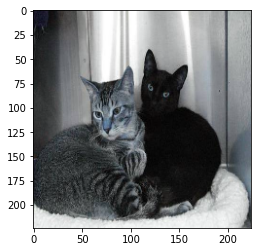

In [14]:
img=cv2.imread('./train/train/cat.8.jpg')
img=cv2.resize(img, (224, 224))/255.0
plt.imshow(img)

In [15]:
model.predict(img.reshape(1, 224, 224, 3)).argmax()
#0 is cat, 1 is dog

0

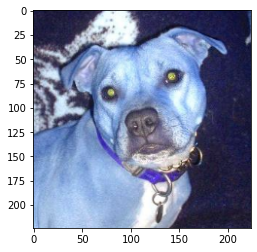

In [12]:
test=cv2.imread('./test/test/2.jpg')
test=cv2.resize(test, (224, 224))/255.0
plt.imshow(test)

In [13]:
model.predict(test.reshape(1, 224, 224, 3)).argmax()

1

**VGG16 Dogs-vs-cats Model**

In [16]:
vgg=tf.keras.applications.vgg16.VGG16(input_shape=(224, 224, 3), weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 1s 0us/step


In [17]:
for layer in vgg.layers:
    layer.trainable=False

In [18]:
from keras.models import Model

In [19]:
vgg_last_layer=Flatten()(vgg.output)
op_layer=Dense(units=2, activation='softmax', kernel_initializer='normal')(vgg_last_layer)

In [20]:
model=Model(inputs=vgg.input, outputs=op_layer)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [22]:
model.fit(train_data, steps_per_epoch=len(train_data), epochs=5)

Epoch 1/5
782/782 [==============================] - 2695s 3s/step - loss: 0.3621 - accuracy: 0.8698
Epoch 2/5
782/782 [==============================] - 2690s 3s/step - loss: 0.2740 - accuracy: 0.9091
Epoch 3/5
782/782 [==============================] - 2690s 3s/step - loss: 0.2354 - accuracy: 0.9230
Epoch 4/5
782/782 [==============================] - 2690s 3s/step - loss: 0.2322 - accuracy: 0.9231
Epoch 5/5
782/782 [==============================] - 2690s 3s/step - loss: 0.2077 - accuracy: 0.9319


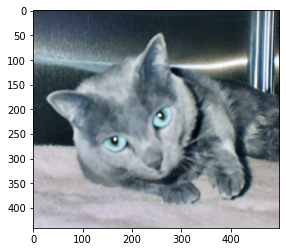

In [29]:
test=cv2.imread('./test/test/99.jpg')
plt.imshow(test)

In [30]:
test=cv2.resize(test, (224, 224))/255.0
model.predict(test.reshape(1, 224, 224, 3)).argmax()

0

In [28]:
train_data.class_indices

{'cat': 0, 'dog': 1}